# KLASIFIKACIJA SLIKA

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

podaci = X_train

# ANALIZA SKUPA PODATAKA

In [2]:
podaci.shape

(60000, 28, 28)

In [3]:
len(y_train)

60000

In [4]:
y_train.shape

(60000,)

In [5]:
import numpy as np

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
len(y_test)

10000

# PRETPROCESIRANJE PODATAKA

In [9]:
from matplotlib import pyplot as plt

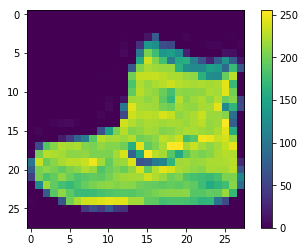

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Reshape the images to 28x28x1 and normalize the pixel values to the range [0, 1]
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0

In [12]:
klase = ['majica', 'pantalone', 'dzemper', 'haljina', 'kaput', 'sandale', 'kosulja', 'patike', 'torba', 'cizme']

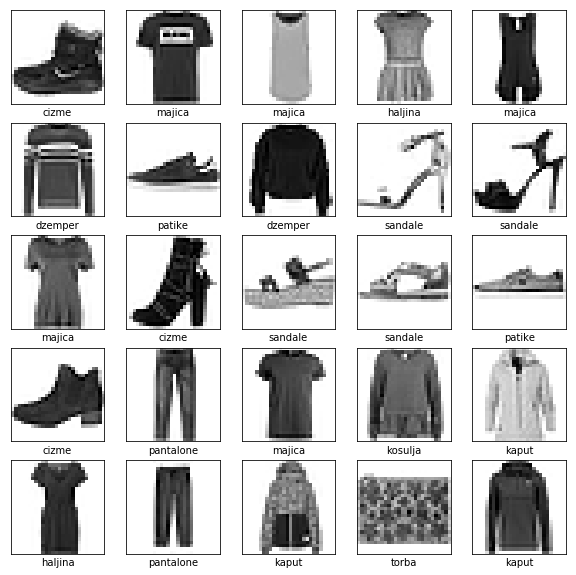

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(podaci[i], cmap=plt.cm.binary)
    plt.xlabel(klase[y_train[i]])
plt.show()

# KREIRANJE MODELA I DEFINISANJE SLOJEVA

In [15]:
# Define the CNN model
#model = tf.keras.models.Sequential([
 #   tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  #  tf.keras.layers.MaxPooling2D((2, 2)),
   # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   # tf.keras.layers.MaxPooling2D((2, 2)),
   # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.Flatten(),
   # tf.keras.layers.Dense(128, activation='relu'),
   # tf.keras.layers.Dense(10, activation='softmax')
#])

#neuronska mreza
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile the model
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# OBUČAVANJE MODELA

In [17]:
# Train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5014 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2561 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2477 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.237

# EVALUACIJA TAČNOSTI

In [18]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3414 - accuracy: 0.8772


[0.34139224886894226, 0.8772000074386597]

# KORIŠĆENJE MODELA

In [20]:
output = model.predict(X_train)

In [21]:
import numpy as np

In [22]:
predvidjene_kategorije = [np.argmax(output[i]) for i in range(len(output))]

# DEFINISANJE TAČKE

In [25]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# ULAZNI PODACI FAZI LOGIKE

In [28]:
class FuzzyInput:
    def __init__(self, name, points, x_test):
        self.points = points
        self.name = name
        self.x_test = x_test
        self.mu = self.calcMu()
        
    def calcMu(self):
        if self.x_test <= self.points[0].x:
            return self.points[0].y
        elif self.x_test >= self.points[-1].x:
            return self.points[-1].y
        
        for p1, p2 in zip(self.points, self.points[1:]):
            if self.x_test >= p1.x and self.x_test <= p2.x:
                if p1.y == 1 and p2.y == 1:
                    return self.points[0].y
                return FuzzyInput.line_through_two_points(p1, p2)(self.x_test)
        
    @staticmethod
    def line_through_two_points(a, b): 
        c = (b.x - a.x) / (b.y - a.y)
        return lambda x_test: (x_test - a.x) / c + a.y

In [29]:
from statistics import mean

# IZLAZNI PODACI FAZI LOGIKE

In [30]:
class FuzzyOutput:
    def __init__(self, name, points):
        self.name = name
        self.points = points
        self.mu = 0
        self.c = self.calcC()
        
    def calcC(self):
        return mean([p.x for p in self.points if p.y == 1])

In [32]:
from enum import Enum, unique, auto

# @unique
class LogicOp(Enum):
    AND = auto()
    OR = auto()
    XOR = auto()

# PRAVILA FAZI LOGIKE

In [33]:
class Rule:
    def __init__(self, input1, input2, output, operator):
        if operator == LogicOp.AND:
            output.mu = max(output.mu, min(input1.mu, input2.mu))
        else:
            output.mu = max(output.mu, max(input1.mu, input2.mu))